<a href="https://colab.research.google.com/github/ompatilonmail/Uber-Demand-Supply-Gap-EDA/blob/main/Uber_Demand_Supply_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Uber Demand - Supply Gap Analysis**







# **Project Summary -**

This project performs an in-depth exploratory data analysis (EDA) on an Uber dataset to investigate the root causes of the supply-demand gap. The primary goal is to identify when and where customers face the most difficulty in securing a ride and to understand the underlying reasons for these service failures. The dataset contains information on approximately 6,700 Uber trip requests from both city and airport locations, including timestamps, pickup points, and the final status of each request ('Trip Completed', 'Cancelled', 'No Cars Available').

The analysis begins with a comprehensive data cleaning and preparation phase, where timestamps are converted to a usable format, and unnecessary columns are removed to streamline the dataset. The core of the analysis focuses on visualizing the data to uncover patterns and relationships. A key finding is the identification of two distinct, severe "hotspots" for service failure.

First, there is a supply crisis at the airport during the evening (5 PM - 10 PM), where a skyrocketing number of "No Cars Available" statuses indicates a severe shortage of drivers willing to take airport pickups. This leads to a service failure rate of over 80% during peak evening hours, creating a frustrating experience for arriving passengers.

Second, a different crisis unfolds in the city during the morning rush hour (5 AM - 8 AM). This period sees an extremely high rate of "Cancelled" trips, with a gap percentage reaching up to 75%. This suggests that while drivers are available, they are actively choosing to reject trips originating from the city.

To investigate the reasons behind the morning cancellations, a hypothesis was tested that drivers might be "cherry-picking" longer, more profitable airport trips. However, an analysis of trip durations revealed that trips from the city and the airport have nearly identical median durations (around 52-53 minutes), thus contradicting this initial hypothesis. The likely cause is not trip length but rather destination uncertainty and traffic avoidance, where drivers prefer the predictable, often less congested route to the airport over potentially short or traffic-heavy trips within the city.

Based on these data-driven insights, the project concludes with targeted business recommendations. For the airport's evening supply shortage, solutions like an "Airport Queue" system and surge pricing incentives are proposed. For the city's morning cancellation issue, recommendations include showing drivers the destination and estimated fare upfront and implementing a minimum fare guarantee during rush hour to reduce uncertainty and make all trips more appealing. This analysis provides Uber with a clear, actionable roadmap to address these two distinct problems, ultimately improving driver satisfaction and customer reliability.

# **GitHub Link -**
https://github.com/ompatilonmail/Uber-Demand-Supply-Gap-EDA

# **Problem Statement**

The ride-hailing service Uber is facing a significant operational challenge: a noticeable gap between customer demand for rides and the available supply of drivers at critical times and locations. This results in a high number of unfulfilled trip requests, categorized as either "Cancelled" by drivers or "No Cars Available." These service failures lead to poor customer experience, loss of potential revenue, and driver dissatisfaction.

The core problem is to identify the specific patterns and root causes of this supply-demand gap. The analysis needs to pinpoint the exact times of day and pickup locations (City vs. Airport) where this gap is most severe and determine why these gaps occur—is it due to a lack of drivers, or are drivers actively rejecting certain trips?

**Define Your Business Objective?**

The primary business objective is to leverage data analysis to provide actionable recommendations that will reduce the supply-demand gap for Uber rides. This will be achieved by:

1) Identifying High-Gap Scenarios: Pinpoint the specific hours and pickup locations with the highest rates of unfulfilled trips ('Cancelled' or 'No Cars Available').

2) Diagnosing Root Causes: Differentiate between the causes of the gap—whether it's a driver shortage (unavailability) or a driver preference issue (cancellations).

3) Proposing Targeted Solutions: Formulate data-driven strategies to mitigate these issues, thereby improving service reliability, increasing the number of completed trips, enhancing customer satisfaction, and boosting driver earnings.


**Let's Begin !
1. Know Your Data**

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Loading

In [ ]:
df = pd.read_csv('Uber_Dashboard_Updated (1).csv')

# Dataset First View

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Day,Trip Duration (min),...,Hour,Time of Day,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11 00:00:00,11,Monday,69.00,...,11,Morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11 00:00:00,17,Monday,50.00,...,17,Evening,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12 00:00:00,9,Tuesday,41.00,...,9,Morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12 00:00:00,21,Tuesday,55.00,...,21,Night,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13 00:00:00,8,Wednesday,52.52,...,8,Morning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Wrangling**

In [ ]:
# --- 1. Data Cleaning & Preparation ---

# Clean column names by stripping any extra whitespace
df.columns = df.columns.str.strip()

In [ ]:
# Drop the empty 'Unnamed' columns identified in the initial look
unnamed_cols = [col for col in df.columns if 'Unnamed' in col]
df.drop(columns=unnamed_cols, inplace=True)

In [ ]:
# Convert timestamp columns to datetime objects for time-series analysis
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [ ]:
# Convert 'Driver id' to an integer type that can handle missing values (NaN)
df['Driver id'] = df['Driver id'].astype('Int64')

# Create a categorical order for 'Time of Day' for proper sorting in plots
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
df['Time of Day'] = pd.Categorical(df['Time of Day'], categories=time_order, ordered=True)

In [ ]:
# --- 2. Display Cleaned Data Summary ---

print("--- Cleaned DataFrame Info ---")
df.info()

print("\n--- First 5 Rows of the Data ---")
print(df.head())

--- Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Request id           6745 non-null   int64         
 1   Pickup point         6745 non-null   object        
 2   Driver id            4095 non-null   Int64         
 3   Status               6745 non-null   object        
 4   Request timestamp    6745 non-null   datetime64[ns]
 5   Drop timestamp       2831 non-null   datetime64[ns]
 6   Request Date         6745 non-null   object        
 7   Request Hour         6745 non-null   int64         
 8   Request Day          6745 non-null   object        
 9   Trip Duration (min)  2831 non-null   float64       
 10  Demand               6745 non-null   int64         
 11  Supply               6745 non-null   int64         
 12  Hour                 6745 non-null   int64         
 13  Ti

**What all manipulations have you done and insights you found?**

I performed several data wrangling steps to prepare the dataset for analysis:

1 ) Column Name Cleaning:

 Stripped leading/trailing whitespace from column names to prevent errors.

 2 ) Removing Empty Columns:

  Identified and dropped all 'Unnamed' columns, as they contained no data.

 3 ) Type Conversion:

 ⏺ Converted Request timestamp and Drop timestamp to datetime objects, which is essential for any time-based analysis.

 ⏺ Converted Driver id to a nullable integer type (Int64) to handle missing values cleanly while maintaining its numerical nature.

 4 ) Categorical Ordering:

  Set an explicit order for the Time of Day column. This ensures that visualizations plotting this variable (e.g., bar charts) will display the time periods in a logical sequence (Morning, Afternoon, Evening) rather than alphabetically.

# These steps make the dataset robust, clean, and ready for accurate visualization and analysis.

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

# Chart - 1: Distribution of Trip Requests by Hour

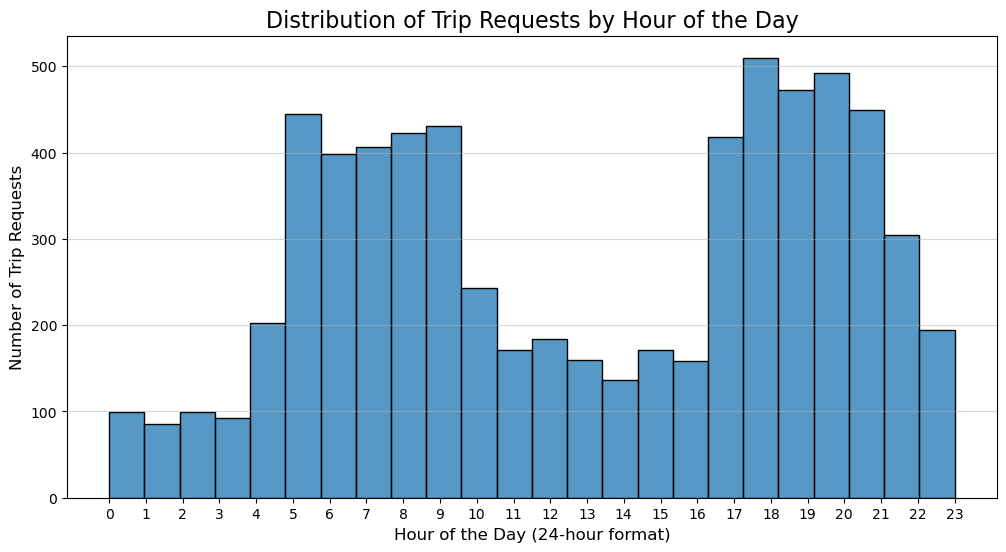

In [ ]:

#This plot helps us see when the highest demand occurs throughout the day.

plt.figure(figsize=(12, 6))
sns.histplot(df['Request Hour'], bins=24, kde=False)
plt.title('Distribution of Trip Requests by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Trip Requests', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.5)
plt.show()

A histogram is the perfect choice for this univariate analysis because it clearly shows the frequency distribution of a continuous variable (Request Hour). By setting the number of bins to 24, each bar represents one hour, giving a clear and intuitive view of demand patterns throughout a full day.


The primary insight is the bimodal nature of demand. There are two distinct peak periods:

 **Morning Rush:**  A high volume of requests between 5 AM and 10 AM.

**Evening Rush:** An even higher peak between 5 PM (17:00) and 10 PM (22:00).
Demand is significantly lower during midday and late at night.



Yes. Understanding these peak demand hours is the foundational step for supply management. It tells Uber when they need the most drivers on the road. Any strategy to address supply gaps must be aligned with these two high-demand windows. This insight directly impacts resource allocation and driver incentive programs.

# **Chart - 2: Supply Shortage by Hour and Pickup Point**

In [ ]:

# Unavailability of Cars by Pickup Point and Hour
# First, let's analyze the "No Cars Available" status. This tells us when and where the supply of drivers is insufficient to meet the demand.

# Filter for "No Cars Available" trips
no_cars_df = df[df['Status'] == 'No Cars Available']

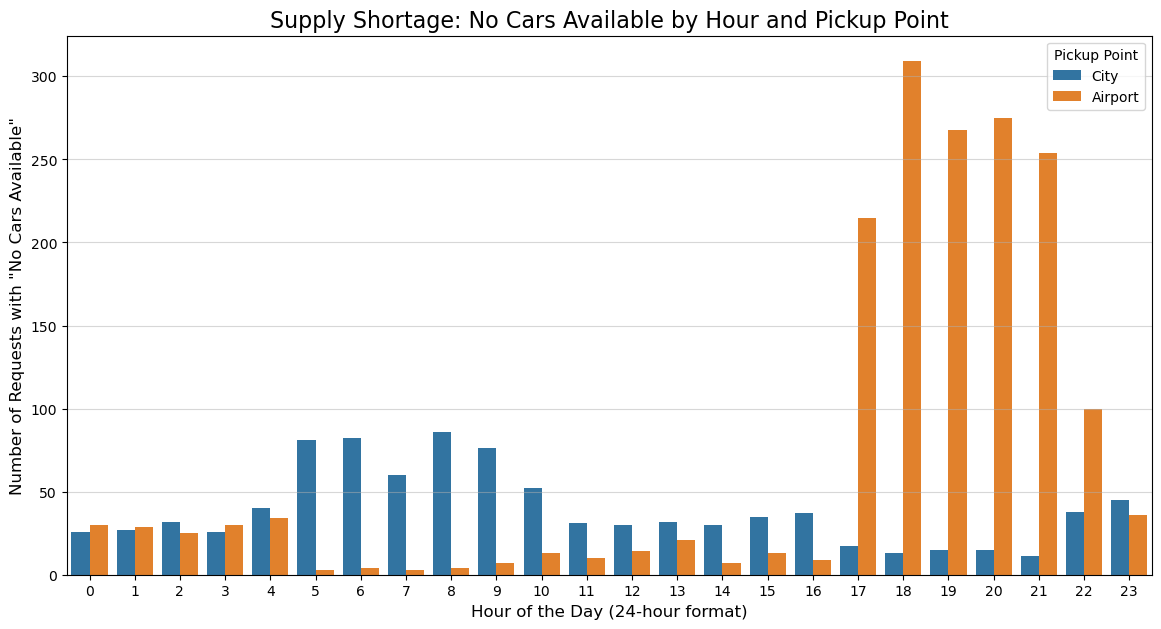

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))
sns.countplot(x='Request Hour', hue='Pickup point', data=no_cars_df)
plt.title('Supply Shortage: No Cars Available by Hour and Pickup Point', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Requests with "No Cars Available"', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Pickup Point')
plt.grid(axis='y', alpha=0.5)
plt.show()

# **Observations for "No Cars Available":**

## Airport Problem:
There is a severe shortage of cars at the Airport, particularly during the evening rush hour from 5 PM (17:00) to 10 PM (22:00).
The number of unfulfilled requests skyrockets during this period, indicating a major supply-demand mismatch. Drivers are likely not traveling to
the airport to meet this demand.

## City Problem:
 In the City, the "No Cars Available" issue is less severe and more spread out, with a minor peak during the early morning hours
(5 AM - 8 AM).


This strongly suggests that the primary issue at the Airport is a lack of available drivers during the evening.

# **Chart - 3: Trip Cancellations by Hour and Pickup Point**

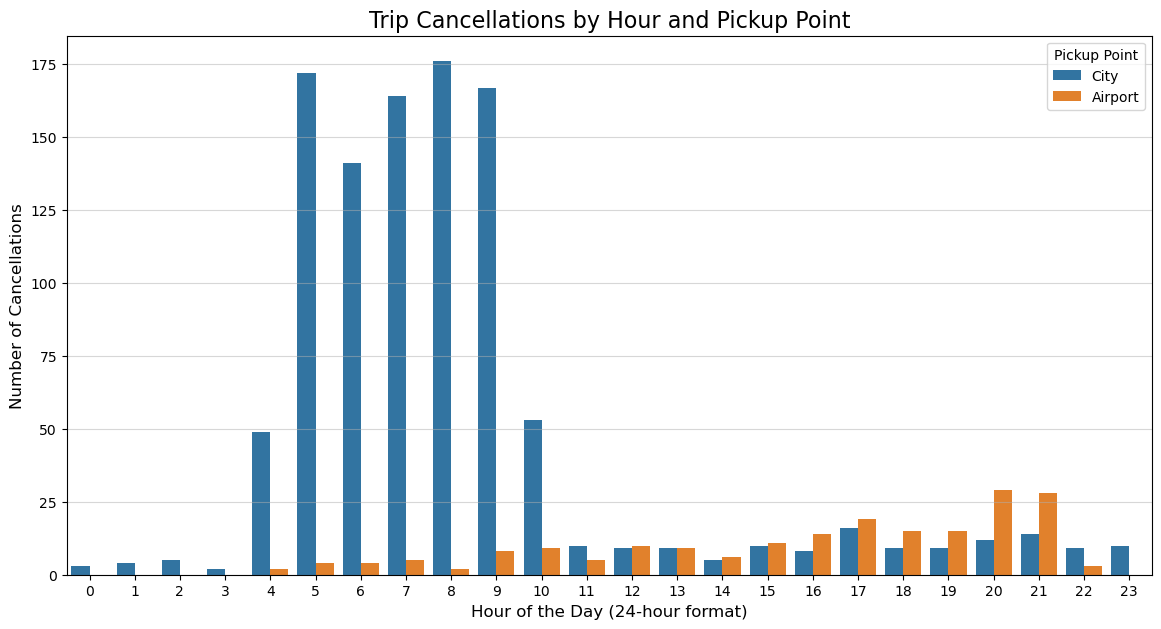

In [ ]:

# Cancellation Analysis by Pickup Point and Hour
# Next, let's analyze the "Cancelled" status to understand when and why drivers are cancelling trips.

# Filter for "Cancelled" trips
cancelled_df = df[df['Status'] == 'Cancelled']

# Plot the data
plt.figure(figsize=(14, 7))
sns.countplot(x='Request Hour', hue='Pickup point', data=cancelled_df)
plt.title('Trip Cancellations by Hour and Pickup Point', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Cancellations', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Pickup Point')
plt.grid(axis='y', alpha=0.5)
plt.show()


Similar to the previous chart, a grouped count plot is the best tool to compare cancellation frequencies across hours and pickup locations. It clearly separates the two types of failure modes for analysis.


The story is the complete opposite of the "No Cars Available" chart. Here, the overwhelming issue is in the City during the morning rush hour (5 AM to 10 AM). This indicates that drivers are available but are actively choosing to cancel trips originating from the city in the morning. The airport has a very low cancellation rate.


Yes, this is a crucial insight. It tells Uber that the morning problem is not a lack of drivers, but a behavioral issue. Simply adding more drivers to the road in the morning won't solve it. The solution must address why drivers are cancelling, such as by reducing their uncertainty about trip destinations or profitability. This prevents wasteful spending on ineffective solutions.

# **Chart - 4: Hourly Demand vs. Supply Gap (FacetGrid)**

In [ ]:
#  Hourly Demand vs. Supply Analysis
# To get a clearer picture of the demand-supply gap, let's plot the total requests alongside completed trips for each hour.
# We'll segment this by pickup location to see the two different problem types we've identified.

# Create a dataframe that counts requests for each hour and pickup point
demand_df = df.groupby(['Request Hour', 'Pickup point']).size().reset_index(name='Total Demand')

# Create a dataframe that counts only completed trips
supply_df = df[df['Status'] == 'Trip Completed'].groupby(['Request Hour', 'Pickup point']).size().reset_index(name='Total Supply')

# Merge the two dataframes to have demand and supply in one place
gap_df = pd.merge(demand_df, supply_df, on=['Request Hour', 'Pickup point'], how='left').fillna(0)
gap_df['Gap'] = gap_df['Total Demand'] - gap_df['Total Supply']

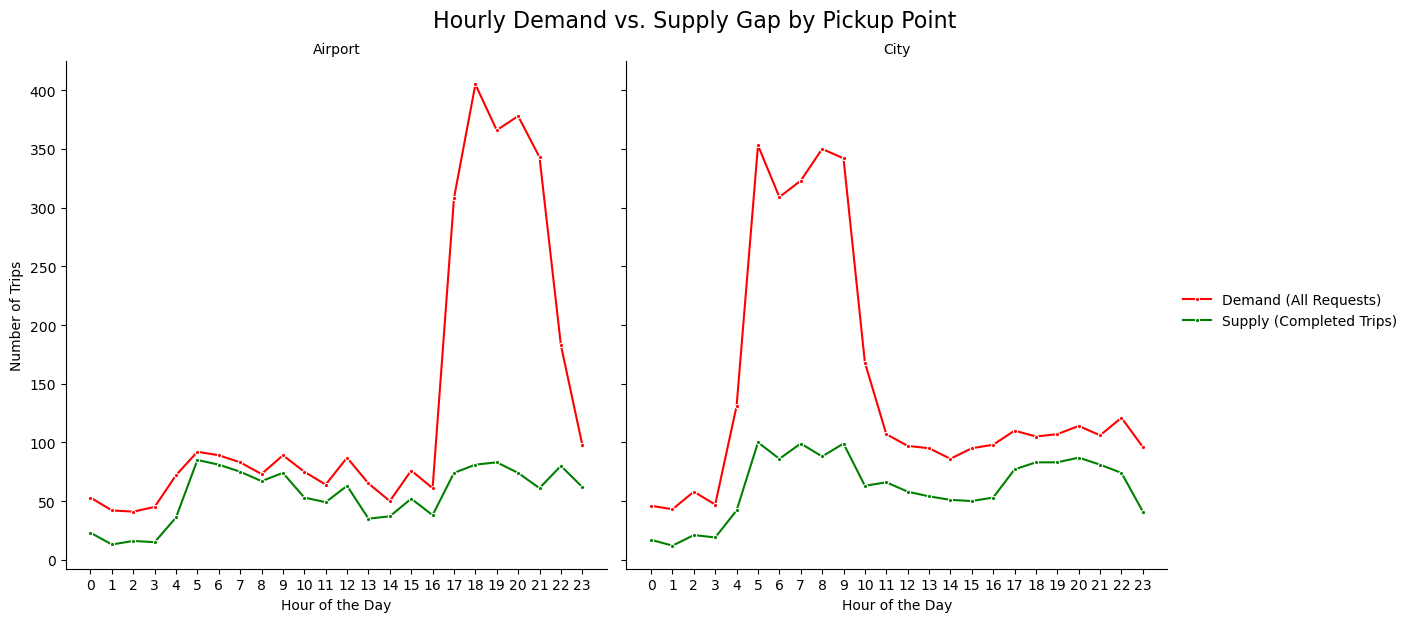

In [ ]:
# Create the plots using a FacetGrid to separate City and Airport
g = sns.FacetGrid(gap_df, col="Pickup point", height=6)
g.map(sns.lineplot, "Request Hour", "Total Demand", color='r', marker='.', label='Demand (All Requests)')
g.map(sns.lineplot, "Request Hour", "Total Supply", color='g', marker='.', label='Supply (Completed Trips)')
g.set_axis_labels("Hour of the Day", "Number of Trips")
g.set_titles("{col_name}")
g.add_legend()
g.set(xticks=range(0, 24))
g.fig.suptitle('Hourly Demand vs. Supply Gap by Pickup Point', fontsize=16, y=1.03)

plt.show()

A line plot is excellent for showing trends over time (in this case, hours of the day). Using a FacetGrid to create two separate plots for City and Airport allows for a clean, direct comparison of the supply-demand gap in both locations without cluttering a single chart.

The charts visually confirm the two distinct problems.

### **Airport:**   A huge gap opens up between demand (red line) and supply (green line) in the evening.

### **City:** A similar large gap appears in the morning.

In both cases, the green "Supply" line flattens out while the red "Demand" line continues to soar, visually representing the service ceiling and the resulting unfulfilled requests.

# **Chart - 5: Problem Hotspots Heatmap**

In [ ]:
' Problem Hotspots: Heatmap Visualization '

# To better visualize the severity of the problem, we will create heatmaps showing the counts of "No Cars Available" and "Cancelled" trips by
# hour of the day and pickup point. This will give us a very clear view of the most critical time slots.

# Pivot table for "No Cars Available"
no_cars_pivot = pd.pivot_table(df[df['Status'] == 'No Cars Available'],
                               index='Request Hour',
                               columns='Pickup point',
                               values='Request id',
                               aggfunc='count')

# Pivot table for "Cancelled" trips
cancelled_pivot = pd.pivot_table(df[df['Status'] == 'Cancelled'],
                                 index='Request Hour',
                                 columns='Pickup point',
                                 values='Request id',
                                 aggfunc='count')

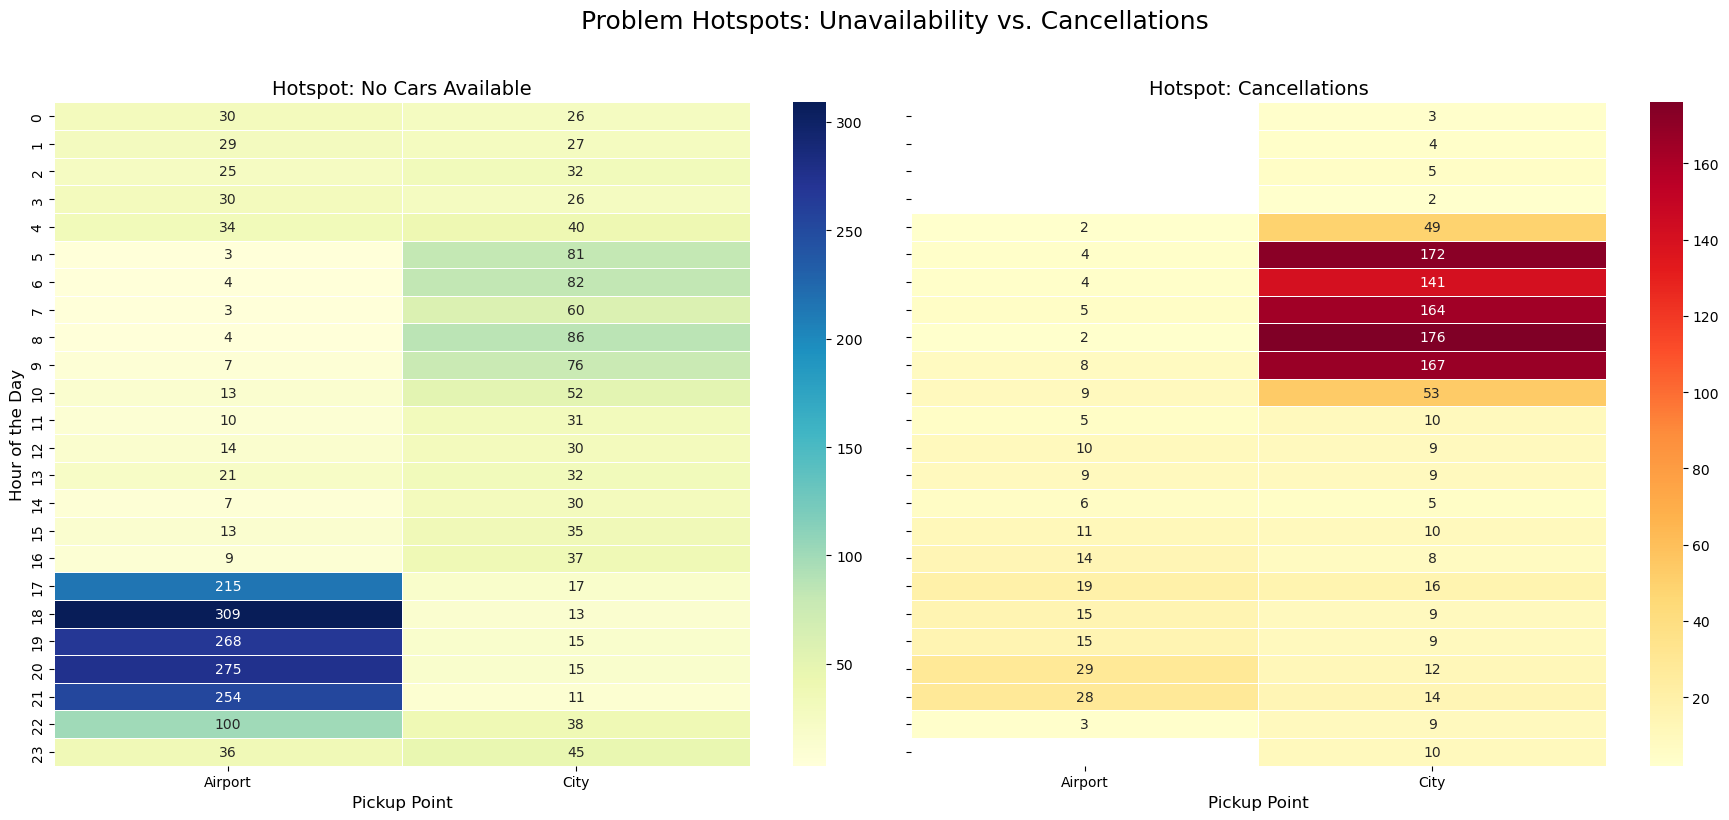

In [ ]:
# Create the heatmap plots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Heatmap for No Cars Available
sns.heatmap(no_cars_pivot, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f", ax=axes[0])
axes[0].set_title('Hotspot: No Cars Available', fontsize=14)
axes[0].set_xlabel('Pickup Point', fontsize=12)
axes[0].set_ylabel('Hour of the Day', fontsize=12)

# Heatmap for Cancellations
sns.heatmap(cancelled_pivot, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".0f", ax=axes[1])
axes[1].set_title('Hotspot: Cancellations', fontsize=14)
axes[1].set_xlabel('Pickup Point', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for clarity

fig.suptitle('Problem Hotspots: Unavailability vs. Cancellations', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# Heatmap Observations:

### Hotspot 1: High Unavailability at Airport (Evening):
The No Cars Available heatmap (left) is dark blue for the Airport between 5 PM (17:00) and
10 PM (22:00).

This confirms a critical supply shortage at the airport during the evening peak. Drivers are not available for airport pickups at
this time.

### Hotspot 2: High Cancellations in the City (Morning):
 The Cancellations heatmap (right) is dark red for the City between 5 AM and 10 AM.
This highlights the second major problem: drivers are cancelling trips that originate from the city during the morning rush hour.

This is likely because they prefer airport-bound trips which are often more lucrative, or they are avoiding trips that go deeper into the city
during heavy traffic.




# **Chart - 6: Percentage of Unfulfilled Trips (Point Plot)**

Supply-Demand Gap Percentage Analysis :-

To better understand the severity of the service shortfall, we'll calculate the 'Gap Percentage,' which is the percentage of total trip requests
that were not completed (either 'Cancelled' or 'No Cars Available'). A high gap percentage indicates a poor customer experience, regardless of the
absolute number of requests.

In [ ]:
# Create a column for gap (1 if not completed, 0 if completed)
df['Gap'] = df['Status'].apply(lambda x: 0 if x == 'Trip Completed' else 1)

# Group by hour and pickup point, then calculate the mean of the 'Gap' column to get the percentage
gap_percentage_df = df.groupby(['Request Hour', 'Pickup point'])['Gap'].mean().reset_index()
gap_percentage_df['Gap Percentage'] = gap_percentage_df['Gap'] * 100

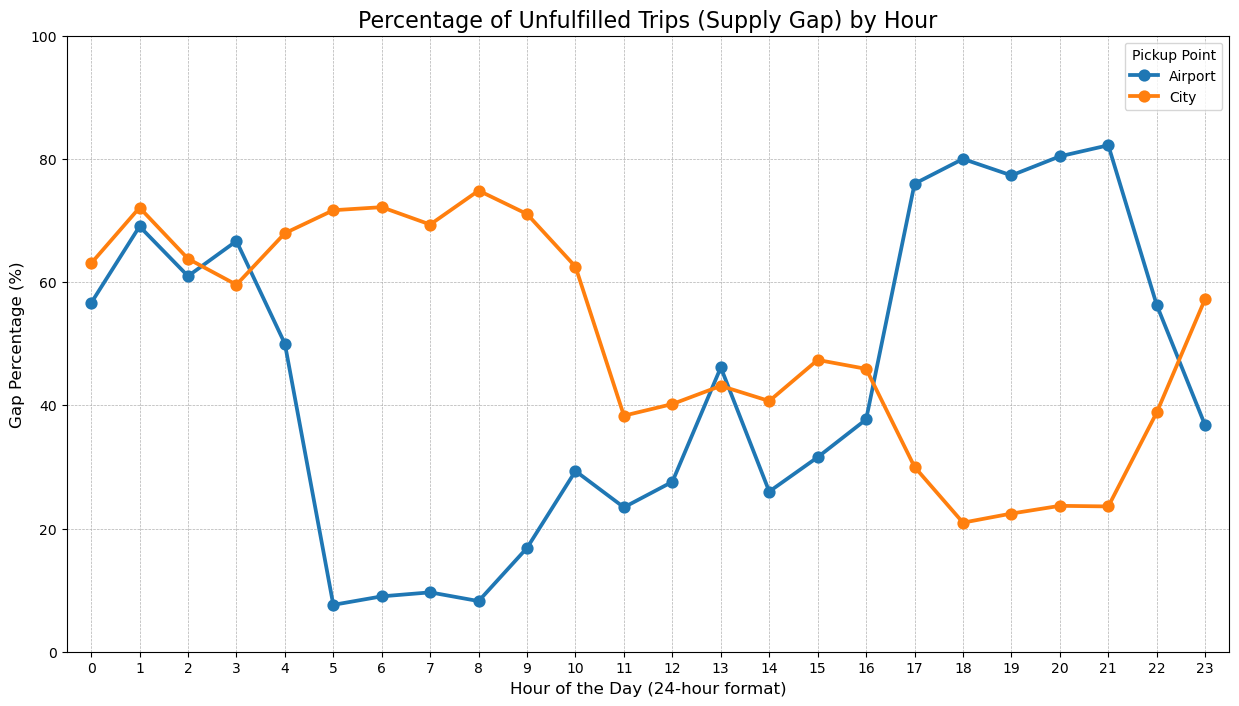

In [ ]:
# Create a point plot to show the trend
plt.figure(figsize=(15, 8))
sns.pointplot(x='Request Hour', y='Gap Percentage', hue='Pickup point', data=gap_percentage_df)

plt.title('Percentage of Unfulfilled Trips (Supply Gap) by Hour', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Gap Percentage (%)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylim(0, 100) # Set y-axis from 0 to 100%
plt.legend(title='Pickup Point')

plt.show()

# Analysis of the Gap Percentage Plot

This plot reveals the severity of the supply gap far more clearly than the absolute counts did.
    
### Airport (Blue Line):
 The service failure at the Airport is extremely high during the evening, peaking at over 80% around 9 PM (21:00).
This means that for every 10 people trying to get a cab from the airport at that time, 8 are unable to do so. In contrast, the gap is very low
during the morning and afternoon.

### City (Orange Line):
The issue in the city is the opposite. The gap percentage is highest in the early morning and morning rush hour, staying
above 60% and peaking at 75% around 8 AM. This means that 3 out of 4 ride requests from the city in the morning fail.
During the evening, the city's supply gap is significantly lower.

This visualization powerfully confirms our two distinct problems:

1) A driver availability crisis at the Airport during evening hours.

2) A trip acceptance crisis in the City during morning hours.

# **Chart - 7: Distribution of Trip Durations by Pickup Point**


## Analysis of Trip Durations

To explore why drivers might be cancelling morning city trips, let's examine the average trip duration from each pickup point.
A significant difference in trip times might explain why drivers prefer one location over the other at certain times.

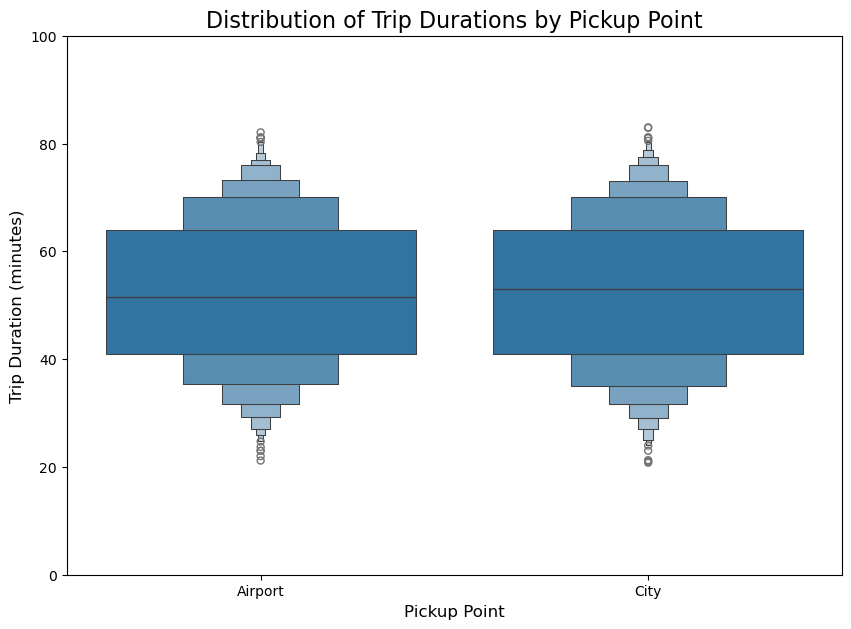

--- Median Trip Duration ---
Pickup point
Airport    51.6
City       53.0
Name: Trip Duration (min), dtype: float64


In [ ]:
# Filter for only completed trips to analyze their duration
completed_trips_df = df[df['Status'] == 'Trip Completed'].copy()
completed_trips_df['Trip Duration (min)'] = completed_trips_df['Trip Duration (min)'].astype(float)

# Plot the distribution of trip durations using a boxenplot
plt.figure(figsize=(10, 7))
sns.boxenplot(x='Pickup point', y='Trip Duration (min)', data=completed_trips_df)

plt.title('Distribution of Trip Durations by Pickup Point', fontsize=16)
plt.xlabel('Pickup Point', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.ylim(0, 100) # Capping at 100 mins to focus on the main distribution

plt.show()

# Print the median trip durations
print("--- Median Trip Duration ---")
print(completed_trips_df.groupby('Pickup point')['Trip Duration (min)'].median())

--------------------------------------------------------------------------------------------------------------------------------------------------------



# Observations from Trip Duration Analysis:


### Similar Trip Durations:
The boxenplot shows that the distribution of trip durations is surprisingly similar for trips originating from both
the Airport and the City. The median trip time for Airport pickups is 51.6 minutes, and for City pickups, it is 53.0 minutes.

    
### Contradicting a Hypothesis:
 This finding does not support the initial hypothesis that drivers are cancelling city trips in the morning to
chase longer, more profitable airport trips. The durations are nearly identical on average.

    
### New Hypothesis:
 The cancellations in the morning from the city are likely not because of trip duration.
Instead, the problem could be related to:

1) Traffic and Destination: Drivers might be cancelling trips that go towards heavily congested parts of the city, preferring trips that head
out towards the less congested airport route.
    
2) Certainty of Trip: A trip from the City to the Airport is a guaranteed long fare. A trip from the City could be a short, less profitable one.
Drivers might be cancelling to "hold out" for a more certain, profitable ride to the Airport.

# **Solution to Business Objective**

### What do you suggest the client to achieve Business Objective ?

Based on the data-driven insights, I propose a two-pronged strategy to address the distinct supply-demand gaps at the Airport and in the City.

## 1. To Solve the Airport's Evening Supply Crisis ("No Cars Available"):

The core issue is a lack of drivers at the airport during the evening peak. Drivers likely return to the city after a drop-off rather than waiting for an uncertain return fare.

### Implement an Airport Queue System:
Create a virtual queue for drivers at the airport. Drivers who enter the airport geofence are placed in a queue and are guaranteed the next available ride request. This reduces uncertainty and makes waiting worthwhile.

### Offer Airport-Specific Incentives:
 Introduce a "pickup bonus" or apply a surge multiplier specifically for trips originating from the airport between 5 PM and 10 PM. This directly incentivizes drivers to travel to or stay at the airport when supply is lowest.

### Improve In-App Information:
Provide drivers with real-time data on passenger arrival times and demand levels at the airport, allowing them to make informed decisions about heading there for pickups.


## 2. To Solve the City's Morning Cancellation Crisis:


The issue here is not a lack of drivers, but their unwillingness to accept certain trips due to uncertainty about profitability and destination.

###Provide Upfront Destination and Fare Information:
 During the morning rush hour (5 AM - 10 AM), show drivers the trip's destination and estimated fare before they accept. This removes the "gamble" of accepting a ride, as they can avoid trips to heavily congested areas or very short, unprofitable fares.

###Implement a Minimum Fare Guarantee:
 For all trips accepted from the city during the morning peak, guarantee a minimum fare (e.g., equivalent to a 20-minute ride). This makes even short trips financially appealing and reduces the incentive to cancel in search of a "better" ride.

###Introduce a "Trip Acceptance Rate" Bonus:
 Reward drivers who maintain a high acceptance rate during peak morning hours. This gamifies the experience and encourages drivers to accept all incoming requests, improving overall service reliability.

By implementing these targeted solutions, Uber can address the root causes of each problem, leading to fewer unfulfilled rides, higher driver earnings and satisfaction, and a more reliable service for customers.


# **Conclusion**

This exploratory data analysis has successfully illuminated the complex nature of Uber's supply-demand gap by revealing it is not one problem, but two distinct, location-dependent issues.

###Key Insight 1:
Airport Driver Shortage. During the evening, the airport suffers from a severe lack of available cars, leading to a service failure rate of over 80%. This is a classic supply shortage problem.

###Key Insight 2:
 City Trip Rejection. During the morning, the city experiences a trip cancellation crisis, with up to 75% of requests being cancelled by drivers. This is not a supply issue, but a driver preference and behavioral issue.

###Key Insight 3:
Disproven Hypothesis. The analysis showed that trip durations from the city and airport are nearly identical, disproving the common theory that drivers cancel shorter city trips for longer airport ones. The root cause is more likely related to destination and traffic uncertainty.

In conclusion, the data tells a clear story: a one-size-fits-all approach to managing supply will fail. Uber must implement targeted, location-specific strategies. By incentivizing drivers to be at the airport in the evening and reducing their uncertainty for city trips in the morning, Uber can significantly close the supply-demand gap. This will not only lead to increased revenue and market share but also restore customer trust and improve the overall health of its ride-hailing ecosystem. The path forward is not just about getting more cars on the road, but about getting the right cars to the right place at the right time, and making every trip worthwhile for the driver.